<a href="https://colab.research.google.com/github/swetha-venkatesan/house-price/blob/main/housing_price_detectionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
house=pd.read_csv("/content/Housing.csv")

In [ ]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
house.shape

(545, 13)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
house['mainroad'] = labelencoder.fit_transform(house['mainroad'])
print(house['mainroad'].unique())

house['guestroom'] = labelencoder.fit_transform(house['guestroom'])
print(house['guestroom'].unique())

house['basement'] = labelencoder.fit_transform(house['basement'])
print(house['basement'].unique())

house['hotwaterheating'] = labelencoder.fit_transform(house['hotwaterheating'])
print(house['hotwaterheating'].unique())

house['airconditioning'] = labelencoder.fit_transform(house['airconditioning'])
print(house['airconditioning'].unique())

house['prefarea'] = labelencoder.fit_transform(house['prefarea'])
print(house['prefarea'].unique())

house['furnishingstatus'] = labelencoder.fit_transform(house['furnishingstatus'])
print(house['furnishingstatus'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1 2]


In [ ]:
x=house[["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement",'hotwaterheating','airconditioning',"parking","prefarea",'furnishingstatus']]
x.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0


In [ ]:
y=house[["price"]]
y.head(2)

,price
0,13300000
1,12250000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(490, 12)
(55, 12)
(490, 1)
(55, 1)


In [ ]:
# linear

from sklearn.metrics import r2_score
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

0.591274784517247


In [ ]:
#dt

from sklearn.metrics import r2_score
from sklearn import tree
reg = linear_model.LinearRegression()


clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

0.4665929570443602


In [ ]:
#svr

# from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn import svm

regr = svm.SVR()
regr.fit(x_train,y_train)

y_pred = regr.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)

-0.06206683362958931


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
prediction=clf.predict([[7420,4,2,3,1,0,0,0,1,2,1,0]])
prediction


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7035000.])

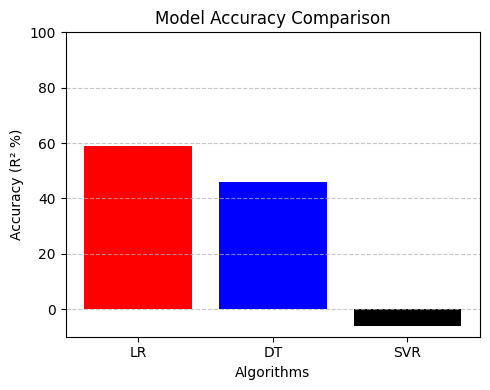

In [ ]:
import matplotlib.pyplot as plt

# Models and their R² scores or accuracies
algorithms = ['LR', 'DT', 'SVR']
accuracies = [59, 46, -6]  # Use -6 instead of -06

# Bar plot
plt.figure(figsize=(5,4))
plt.bar(algorithms, accuracies, color=['red', 'blue', 'black'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (R² %)')
plt.title('Model Accuracy Comparison')
plt.ylim(-10, 100)  # Allows showing negative values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
